### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Import and Inspection

In [2]:
# Load the dataset
df = pd.read_csv('student_performance_dataset.csv')

# Display the first few rows
print('DataFrame Head:')
df.head()

DataFrame Head:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [3]:
# Display the column information
print('\nDataFrame Info:')
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


### Exploratory Data Analysis (EDA): Frequency Plots

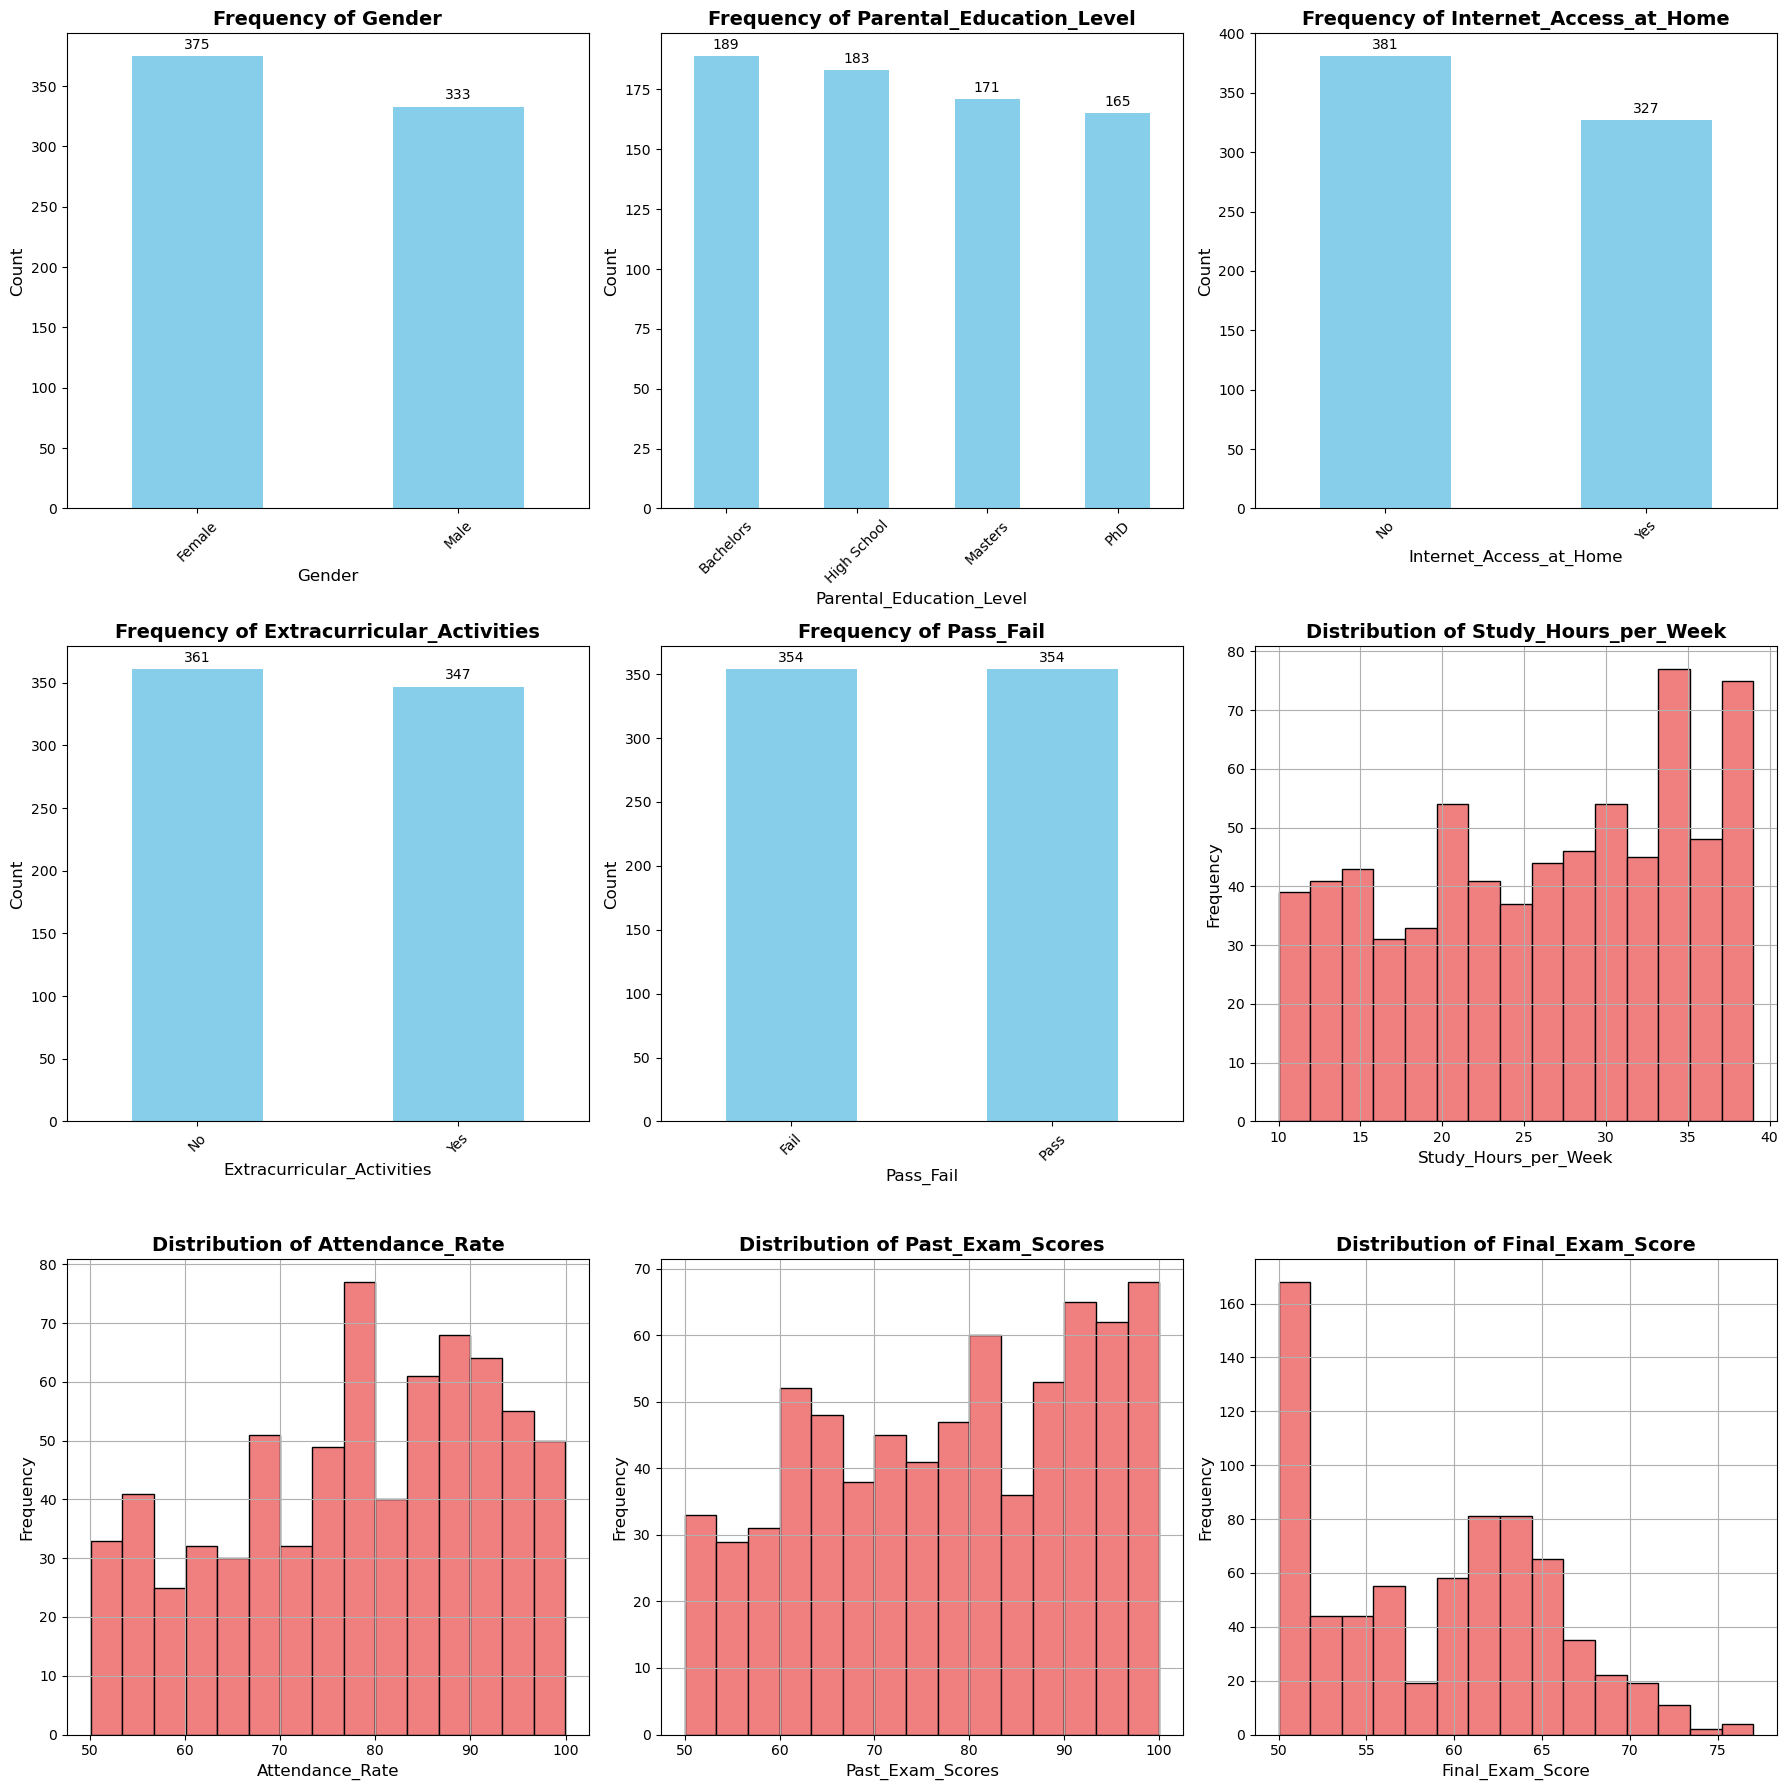

In [4]:
# Define columns for plotting
categorical_cols = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']
numerical_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']
all_cols = categorical_cols + numerical_cols

# Set up the figure and axes for a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

# Plotting
for i, col in enumerate(all_cols):
    ax = axes[i]
    if col in categorical_cols:
        # Bar chart for categorical columns
        # Sorting by index for better visualization of categories like 'High School' to 'PhD'
        value_counts = df[col].value_counts().sort_index()
        value_counts.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequency of {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        # Add labels to the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    elif col in numerical_cols:
        # Histogram for numerical columns
        df[col].hist(ax=ax, bins=15, edgecolor='black', color='lightcoral')
        ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.tick_params(axis='x', rotation=0)

# Hide the last unused subplot (since we have 9 plots, all 9 are used in a 3x3 grid)
if len(all_cols) < len(axes):
    for j in range(len(all_cols), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap and save the plot
plt.tight_layout()
plt.show()

### Validate Dataset For Missing Values

In [5]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

### Pre-process Dataset

In [6]:
df = df.drop(columns=['Student_ID'])
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,Male,16,78.222927,73,PhD,No,No,50,Fail
2,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,Female,37,98.655517,63,Masters,No,Yes,70,Pass


### Categorical to Numerical Conversion (Feature Engineering)

In [7]:
# 1. Label Encoding for Binary and Ordinal Features
# Defining mappings:
# Pass_Fail (Label): Pass=1, Fail=0
# Gender: Male=1, Female=0
# Internet_Access_at_Home: Yes=1, No=0
# Extracurricular_Activities: Yes=1, No=0
binary_mapping = {
    'Pass_Fail': {'Pass': 1, 'Fail': 0},
    'Gender': {'Male': 1, 'Female': 0},
    'Internet_Access_at_Home': {'Yes': 1, 'No': 0},
    'Extracurricular_Activities': {'Yes': 1, 'No': 0}
}

# Ordinal Encoding for Parental_Education_Level (respecting hierarchy):
# High School=1, Bachelors=2, Masters=3, PhD=4
ordinal_mapping = {
    'Parental_Education_Level': {
        'High School': 1,
        'Bachelors': 2,
        'Masters': 3,
        'PhD': 4
    }
}

# Apply mappings
df = df.replace(binary_mapping)
df = df.replace(ordinal_mapping)

print('Numerical DataFrame Head:')
df.head()

Numerical DataFrame Head:


/tmp/ipykernel_22110/4030238394.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(binary_mapping)
/tmp/ipykernel_22110/4030238394.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(ordinal_mapping)


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1,31,68.267841,86,1,1,1,63,1
1,1,16,78.222927,73,4,0,0,50,0
2,0,21,87.525096,74,4,1,0,55,0
3,0,27,92.076483,99,2,0,0,65,1
4,0,37,98.655517,63,3,0,1,70,1


### Dataset Normalization

In [8]:
# Separate Features (X) and Label (y)
label_column = 'Pass_Fail'
X = df.drop(columns=[label_column])
y = df[label_column]

# Apply Min-Max Scaling to the features (X)
# Initializes the scaler
scaler = MinMaxScaler()
# Fits the scaler to the data and transforms it
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Recombine the normalized features with the unscaled label
df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Display the head of the normalized DataFrame
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1.0,0.724138,0.364105,0.72,0.000000,1.0,1.0,0.481481,1
1,1.0,0.206897,0.563803,0.46,1.000000,0.0,0.0,0.000000,0
2,0.0,0.379310,0.750403,0.48,1.000000,1.0,0.0,0.185185,0
3,0.0,0.586207,0.841704,0.98,0.333333,0.0,0.0,0.555556,1
4,0.0,0.931034,0.973678,0.26,0.666667,0.0,1.0,0.740741,1


### Model Training

### Data Splitting for Training and Testing

In [9]:
# Separate Features (X) and Label (y)
label_column = 'Pass_Fail'
X = df.drop(columns=[label_column])
y = df[label_column]

# Split the data (80% train, 20% test) using stratification for balanced label distribution
# random_state=42 is used for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shapes of the resulting splits
print('Shape of the data splits:')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Shape of the data splits:
X_train shape: (566, 8)
X_test shape: (142, 8)
y_train shape: (566,)
y_test shape: (142,)


### Logistic Regression Model Training and Evaluation

In [10]:
# Initialize and Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Model Accuracy: 0.9507

Confusion Matrix:
 [[66  5]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

    Fail (0)       0.97      0.93      0.95        71
    Pass (1)       0.93      0.97      0.95        71

    accuracy                           0.95       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142



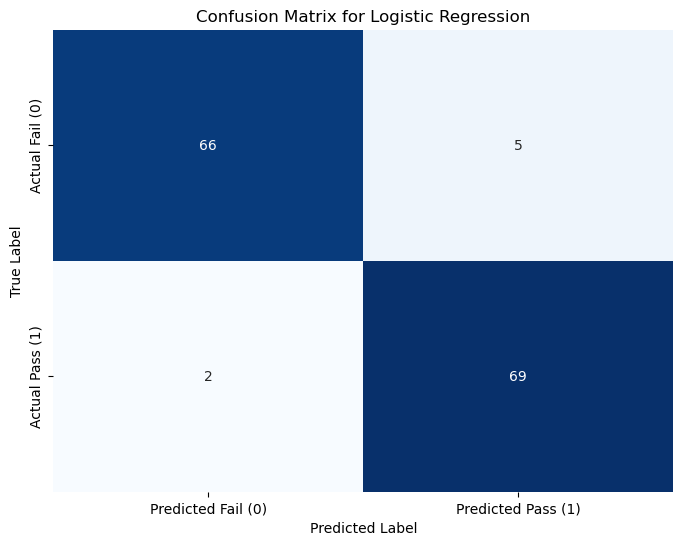

In [11]:
# Make Predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Fail (0)', 'Pass (1)'])

print(f"Model Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fail (0)', 'Predicted Pass (1)'],
            yticklabels=['Actual Fail (0)', 'Actual Pass (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()